# EDA PROJECT ON Airline_Delay_Cause

### Name: PRIYANSHU RAJ
### Registration no. -  12015077
### Section: K20CH
### Roll no: RK20CHB47

# According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded.

# The report is focusing on data from year 2003, estimated that air transportation delays put a 4 billion dollar dent in the country's gross domestic product that year. Full report can be found here.
 
 # But, what are the causes for these delays???
 
  # In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008 and their causes for delay, diversion and cancellation; if any.
  
# The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS).¶






# This dataset is composed by the following variables: 



1.	**Year** :YEAR NAME
2.	**Month** : MONTH NAME
3.  **carrier**  : Abbreviation of carrier
4.  **carrier_name** : the actual carrier name
5.  **airport**  : Abbreviation of airbort
6.  **airport_name** :the actual airport name
7.  **arr_flights** : Number of flights arrived the airport.
8.  **arr_del**  :  Number of flights delayed
9.  **carrier_ct** : Number of flights delayed due to air carrier
10. **weather_ct** : Number of flights delayed due to weather
11. **nas_ct** :  Number of flights delayed due to National Aviation System ( non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control )
12. **security_ct** : Number of flights delayed due to security
13. **late_aircraft_ct** : Number of flights delayed due to a previous flight.
14. **arr_cancelled**  : Number of flight that has been cancelled
15. **arr_diverted**  : Number of flight that has been diverted
16. **arr_delay**  : time of delayed flights
17. **carrier_delay**  : in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
18. **weather_delay**   :  in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
19. **nas_delay**  :  in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
20. **security_delay**  :  in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
21. **late_aircraft_delay**  :in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.




















## Why this dataset?
In transport economics, the value of time is the opportunity cost of the time that a traveler spends on their journey. In essence, this makes it the amount that a traveler would be willing to pay in order to save time, or the amount they would accept as compensation for lost time.
Time is valuable thing therefore this caught my intrest in this dataset and I was curious behind knowing the delay and cause of various airline compny in US from year 2002 to 2022.

# Understanding and preparing the data

In [5]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.0f}'.format

In [6]:
# Reading and showing data
df= pd.read_csv('Airline_Delay_Cause.csv')
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136,7,6,0,...,0,1,0,0,255,222,0,4,0,29
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91,16,7,0,...,0,6,0,0,884,351,0,81,0,452
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19,2,0,0,...,0,1,1,0,138,4,0,106,0,28
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88,14,7,1,...,0,2,0,0,947,585,35,125,0,202
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181,19,14,0,...,0,2,0,0,808,662,0,87,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480,84,26,3,...,0,21,0,0,3744,978,164,1023,0,1579
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505,111,22,2,...,0,13,3,0,4284,1376,138,2132,0,638
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146,36,7,0,...,0,2,0,0,896,205,0,607,0,84
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95,13,4,0,...,0,1,0,0,367,120,0,210,0,37


In [7]:
# head of the data i.e first 5 rows of dataset
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136,7,6,0,...,0,1,0,0,255,222,0,4,0,29
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91,16,7,0,...,0,6,0,0,884,351,0,81,0,452
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19,2,0,0,...,0,1,1,0,138,4,0,106,0,28
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88,14,7,1,...,0,2,0,0,947,585,35,125,0,202
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181,19,14,0,...,0,2,0,0,808,662,0,87,0,59


In [8]:
# tail of data i.e last 5 rows
df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480,84,26,3,...,0,21,0,0,3744,978,164,1023,0,1579
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505,111,22,2,...,0,13,3,0,4284,1376,138,2132,0,638
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146,36,7,0,...,0,2,0,0,896,205,0,607,0,84
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95,13,4,0,...,0,1,0,0,367,120,0,210,0,37
318016,2003,6,DL,Delta Air Lines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3466,454,121,8,...,1,102,9,0,16853,5384,306,5686,28,5449


In [9]:
# shape of dataframe 
df.shape

(318017, 21)

In [10]:
# It means 318017 rows and 21 columns

In [11]:
# The info() method prints information about the DataFrame. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del              317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

In [12]:
# describe() provides purely descriptive information about the dataset.
#This information includes statistics that summarize the central tendency of the variable, their dispersion, the presence of empty values and their shape.
df.describe()

,year,month,arr_flights,arr_del,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017,318017,317529,317289,317529,317529,317529,317529,317529,317529,317529,317529,317529,317529,317529,317529,317529
mean,2012,6,382,73,21,3,24,0,25,7,1,4210,1287,221,1100,7,1596
std,6,3,1027,199,48,10,85,1,75,37,4,12519,3515,862,4636,39,4925
min,2003,1,1,0,0,0,-0,0,0,0,0,0,0,0,-19,0,0
25%,2007,3,59,9,3,0,2,0,2,0,0,436,148,0,56,0,79
50%,2012,6,120,23,8,1,5,0,6,1,0,1201,437,25,203,0,351
75%,2018,10,273,56,20,2,15,0,17,4,1,3080,1100,159,602,0,1110
max,2022,12,21977,6377,1792,718,4091,81,1885,4951,256,433687,196944,57707,238440,3760,148181


In [13]:
# describe(include='object') : Analyzes the object series

In [14]:
df.describe(include='object')

,carrier,carrier_name,airport,airport_name
count,318017,318017,318017,318017
unique,29,33,420,420
top,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,38145,38145,3022,3022


### Cleaning our Dataset
##### IT INCLUDE
###### Are there any useless or redundant variables?
###### Are there any duplicate columns?
###### Does the nomenclature make sense?
###### Are there any new variables we want to create?

In [15]:
# total null values present in our datasheet
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            488
arr_del                728
carrier_ct             488
weather_ct             488
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           488
arr_delay              488
carrier_delay          488
weather_delay          488
nas_delay              488
security_delay         488
late_aircraft_delay    488
dtype: int64

In [16]:
#Check for duplicate 
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
318012    False
318013    False
318014    False
318015    False
318016    False
Length: 318017, dtype: bool

In [17]:
df.duplicated().sum()
#No duplicated() row is present

0

In [18]:
# Count the number of non-duplicates
(~df.duplicated()).sum()

318017

In [19]:
# Extract duplicate rows
df.loc[df.duplicated(), :]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [20]:
# since we have no such row

# use inplace=True to remove duplicates from the original DataFrame
#df.drop_duplicates(inplace=True)

In [21]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            488
arr_del                728
carrier_ct             488
weather_ct             488
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           488
arr_delay              488
carrier_delay          488
weather_delay          488
nas_delay              488
security_delay         488
late_aircraft_delay    488
dtype: int64

In [22]:
df.isnull().sum() * 100 / len(df) 

year                  0
month                 0
carrier               0
carrier_name          0
airport               0
airport_name          0
arr_flights           0
arr_del               0
carrier_ct            0
weather_ct            0
nas_ct                0
security_ct           0
late_aircraft_ct      0
arr_cancelled         0
arr_diverted          0
arr_delay             0
carrier_delay         0
weather_delay         0
nas_delay             0
security_delay        0
late_aircraft_delay   0
dtype: float64

##### Since, the percentage of missing values is very negligible, we can drop the missing rows

In [30]:
df1 = df.dropna()
# here dropna is used to drop all such rows where at least one null values are present


In [31]:
df1.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del                0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [32]:
# shape of dataframe 
df1.shape

(317289, 21)

In [20]:
# IT means I have removed (318017 - 317289 ) i.e 728 rows with null values in it. And now our data is clean.

In [21]:
#help(df.dropna)

### finding the correlation


In [33]:
df1.corr()

,year,month,arr_flights,arr_del,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year,1,-0,-0,-0,-0,-0,-0,-0,-0,0,-0,-0,0,-0,-0,-0,-0
month,-0,1,0,-0,0,-0,-0,0,0,-0,-0,-0,-0,-0,-0,0,-0
arr_flights,-0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1
arr_del,-0,-0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1
carrier_ct,-0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1
weather_ct,-0,-0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1
nas_ct,-0,-0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1
security_ct,-0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
late_aircraft_ct,-0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1
arr_cancelled,0,-0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


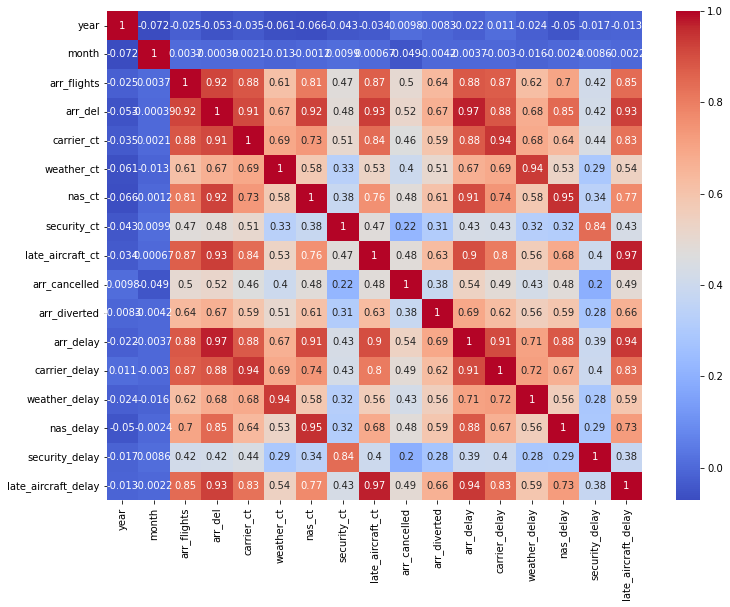

In [34]:
#correlation matrix
plt.figure(figsize = (12,9))
sns.heatmap(df1.corr(), annot = True, cmap = "coolwarm")
plt.show()

Through the correlation matrix we can see how some of the 20 variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.
We can also make the following observations:
- Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes.

<AxesSubplot:xlabel='nas_delay'>

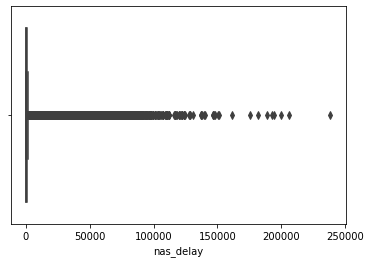

In [35]:
sns.boxplot(df1["nas_delay"])

### UNIVARIATE ANALYSIS

In [36]:
df1.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del                float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [26]:
# Categorical variables - univariate 

In [37]:
df1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136,7,6,0,...,0,1,0,0,255,222,0,4,0,29
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91,16,7,0,...,0,6,0,0,884,351,0,81,0,452
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19,2,0,0,...,0,1,1,0,138,4,0,106,0,28
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88,14,7,1,...,0,2,0,0,947,585,35,125,0,202
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181,19,14,0,...,0,2,0,0,808,662,0,87,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480,84,26,3,...,0,21,0,0,3744,978,164,1023,0,1579
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505,111,22,2,...,0,13,3,0,4284,1376,138,2132,0,638
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146,36,7,0,...,0,2,0,0,896,205,0,607,0,84
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95,13,4,0,...,0,1,0,0,367,120,0,210,0,37


In [38]:
df1['carrier_name'].value_counts()
# This gives the value count of each carrier name

SkyWest Airlines Inc.           38038
Delta Air Lines Inc.            27518
ExpressJet Airlines Inc.        24487
American Airlines Inc.          19770
United Air Lines Inc.           19096
Southwest Airlines Co.          17576
American Eagle Airlines Inc.    15404
Mesa Airlines Inc.              14483
Alaska Airlines Inc.            12940
Frontier Airlines Inc.          12275
Atlantic Southeast Airlines     12158
JetBlue Airways                 11577
US Airways Inc.                 10692
Envoy Air                        8979
Northwest Airlines Inc.          8068
Comair Inc.                      7685
AirTran Airways Corporation      6955
Continental Air Lines Inc.       6908
Pinnacle Airlines Inc.           6434
Allegiant Air                    6369
Endeavor Air Inc.                5513
Republic Airline                 4425
PSA Airlines Inc.                4217
Spirit Air Lines                 3788
Hawaiian Airlines Inc.           3579
America West Airlines Inc.       1579
Virgin Ameri

<AxesSubplot:>

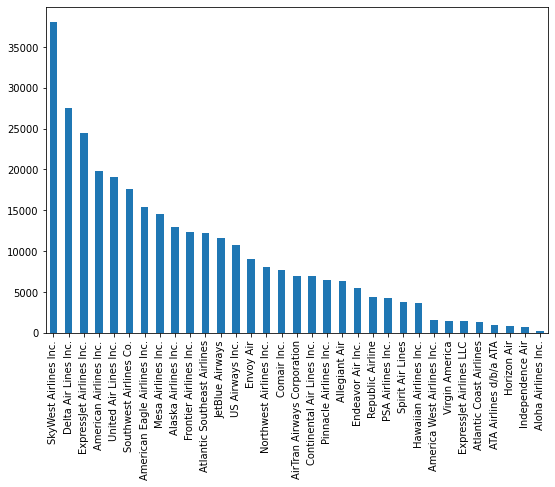

In [39]:
df1.carrier_name.value_counts().plot.bar(figsize=(9,6))

In [37]:
# We can say SkyWest Airlines Inc. is having highest number of flight carrier.

In [40]:
df1.airport.value_counts()

DTW    3022
LAX    2988
LAS    2978
MCI    2964
PIT    2947
       ... 
RCA       1
FNL       1
YNG       1
SKA       1
CBM       1
Name: airport, Length: 418, dtype: int64

In [41]:
df1.airport.nunique()

418

In [42]:
df1.airport_name.value_counts()

Detroit, MI: Detroit Metro Wayne County                  3022
Los Angeles, CA: Los Angeles International               2988
Las Vegas, NV: McCarran International                    2978
Kansas City, MO: Kansas City International               2964
Pittsburgh, PA: Pittsburgh International                 2947
                                                         ... 
Rapid City, SD: Ellsworth AFB                               1
Fort Collins/Loveland, CO: Northern Colorado Regional       1
Youngstown/Warren, OH: Youngstown-Warren Regional           1
Spokane, WA: Fairchild AFB                                  1
Columbus, MS: Columbus AFB                                  1
Name: airport_name, Length: 418, dtype: int64

<AxesSubplot:>

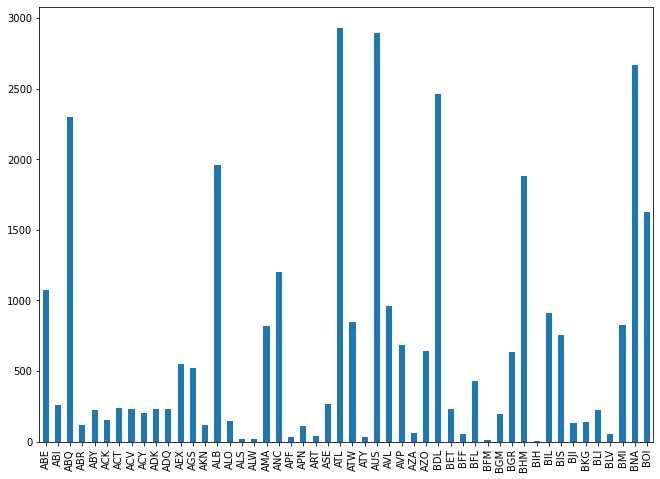

In [43]:
df1.airport.value_counts().sort_index().head(50).plot.bar(figsize=(11,8))

In [44]:
df1['airport']=='ATL'

0         False
1         False
2         False
3         False
4         False
          ...  
318012    False
318013    False
318014    False
318015    False
318016    False
Name: airport, Length: 317289, dtype: bool

<AxesSubplot:>

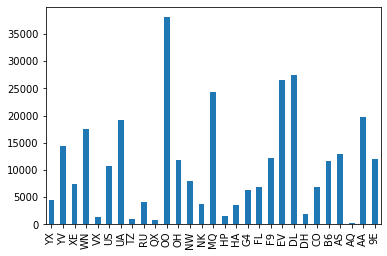

In [45]:
df1.carrier.value_counts().sort_index(ascending=False).plot.bar()

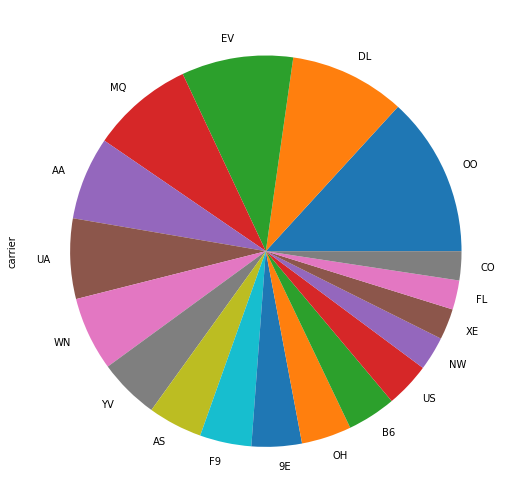

In [46]:
df1.carrier.value_counts().head(18).plot.pie(figsize=(9,9))

plt.show()

In [46]:
# bivarate


#### Which year has the most variety in the carriers and Airports ?

In [33]:
sns.set(rc={'figure.figsize':(8,5)});

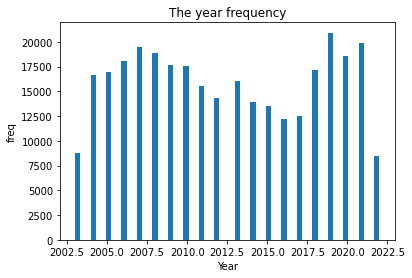

In [47]:
plt.hist(data=df1,x='year',bins='fd');
plt.xlabel('Year')
plt.ylabel('freq');
plt.title('The year frequency');

- That suggest that in rounded 2018 and 2020 it's the biggest era that has the most variety in the carriers and Airports

- Airline industry started to have more airline carries rounded to 2018

#### Which carrier has the most Spread and existence !?

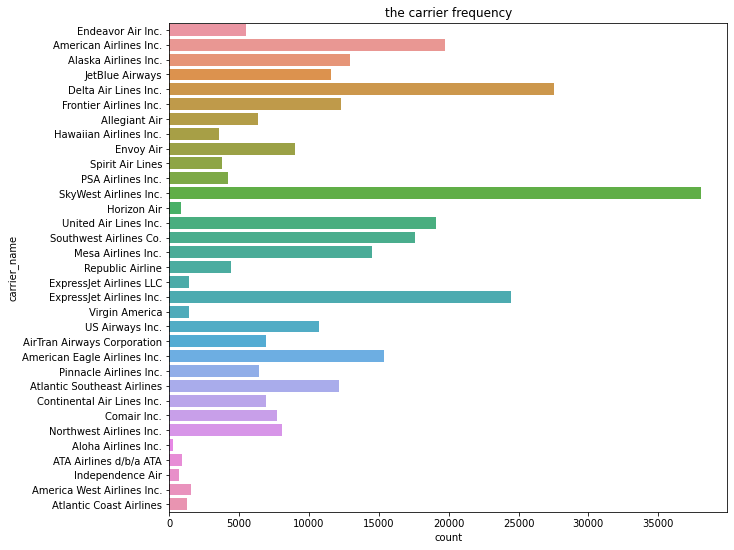

In [48]:
plt.figure(figsize=(10,9)) 
sns.countplot(data=df1,y='carrier_name');
plt.title('the carrier frequency');


- as we see that SkyWest Airlines Inc has more spread and existence

### what are the Most crowded airports in the past 16 years

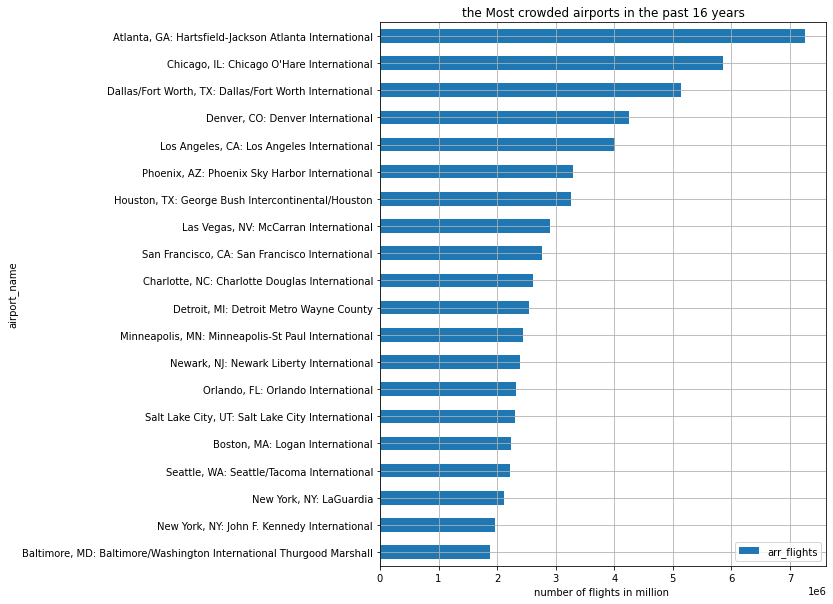

In [49]:
df1.groupby("airport_name").sum()[['arr_flights']].sort_values(by="arr_flights").tail(20).plot(kind='barh',figsize=(8,10),grid=True)
plt.title('the Most crowded airports in the past 16 years')
plt.xlabel('number of flights in million ');

- Atlanta, GA is the most crowded airport over the past 16 years then Chicago II then Dallas/Fort Worth.

In [26]:
# Let's look at the average arrival delay from year 2003 through 2022. 

<AxesSubplot:xlabel='year,month'>

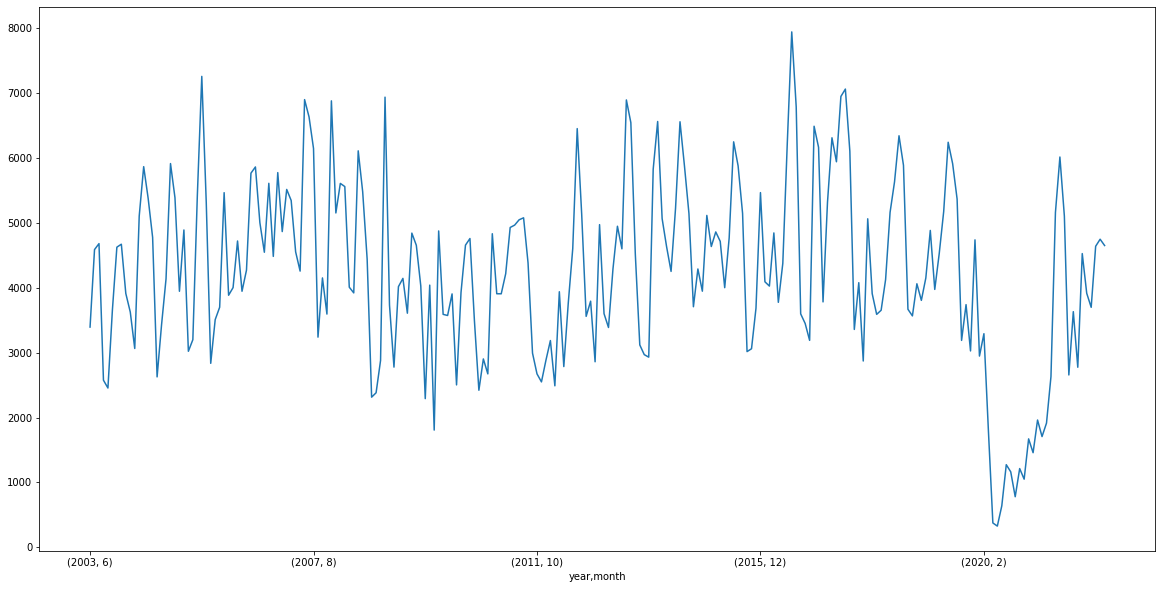

In [50]:
df1.groupby(['year','month']).mean()['arr_delay'].plot(kind='line',figsize=(20,10))

### Observation: On an average, year 2020 has least arrival delays. Again, the reason being the outbrak of COVID-19, and people didnot travel

<AxesSubplot:xlabel='month'>

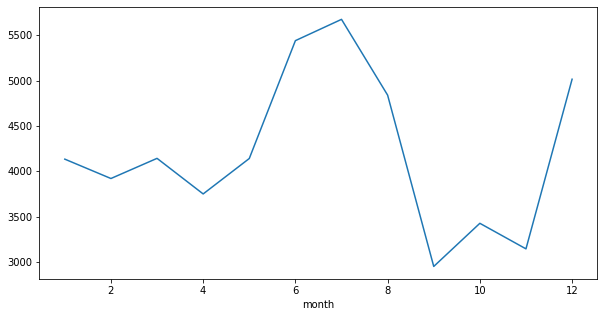

In [51]:
df1.groupby('month').mean()['arr_delay'].plot(kind='line',figsize=(10,5))

### Observation: arrival delays are observed during summers and during christmas/New year time. This is the time where people travel a lot

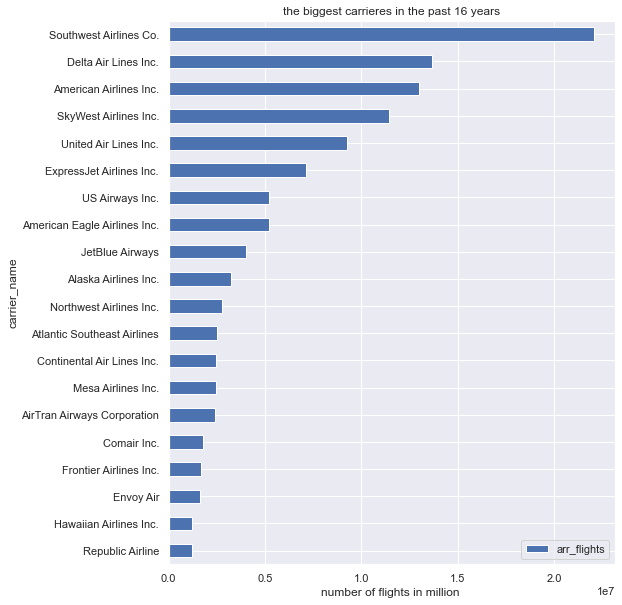

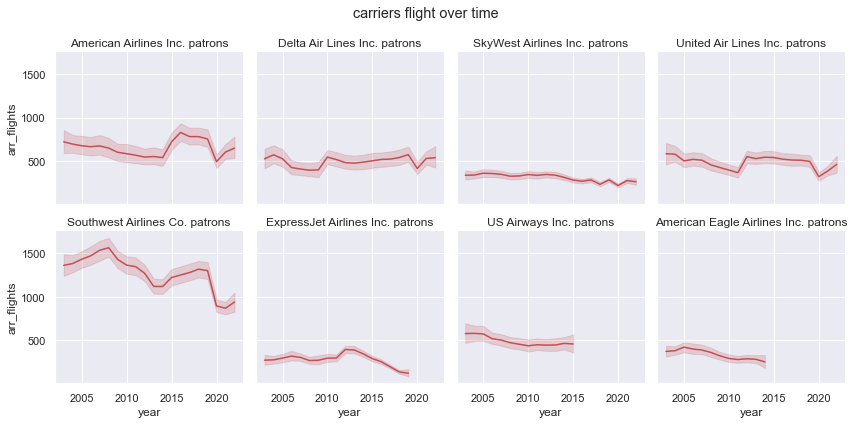

In [37]:
df.groupby('carrier_name').sum()[['arr_flights']].sort_values(by="arr_flights").tail(20).plot(kind='barh',figsize=(8,10),grid=True)
plt.title('the biggest carrieres in the past 16 years')
plt.xlabel('number of flights in million ');

big_carrier=df.query("carrier_name =='Southwest Airlines Co.' or carrier_name =='Delta Air Lines Inc.' or carrier_name =='American Airlines Inc.'or carrier_name =='SkyWest Airlines Inc.'or carrier_name =='United Air Lines Inc.'or carrier_name =='ExpressJet Airlines Inc.'or carrier_name =='US Airways Inc.'or carrier_name =='American Eagle Airlines Inc.'")


g = sns.FacetGrid(big_carrier, col="carrier_name",col_wrap=4)
g.fig.suptitle('carriers flight over time');
g.map_dataframe(sns.lineplot,"year","arr_flights", data=big_carrier,color='r');
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}");

In [1]:
print("**************************git hub***********************************************")

**************************git hub***********************************************


In [2]:
print("github commit 2nd time")

github commit 2nd time
